# 지금 인천항, 부산항의 현재 수온과 조위는?
- OpenAPI
- Pandas

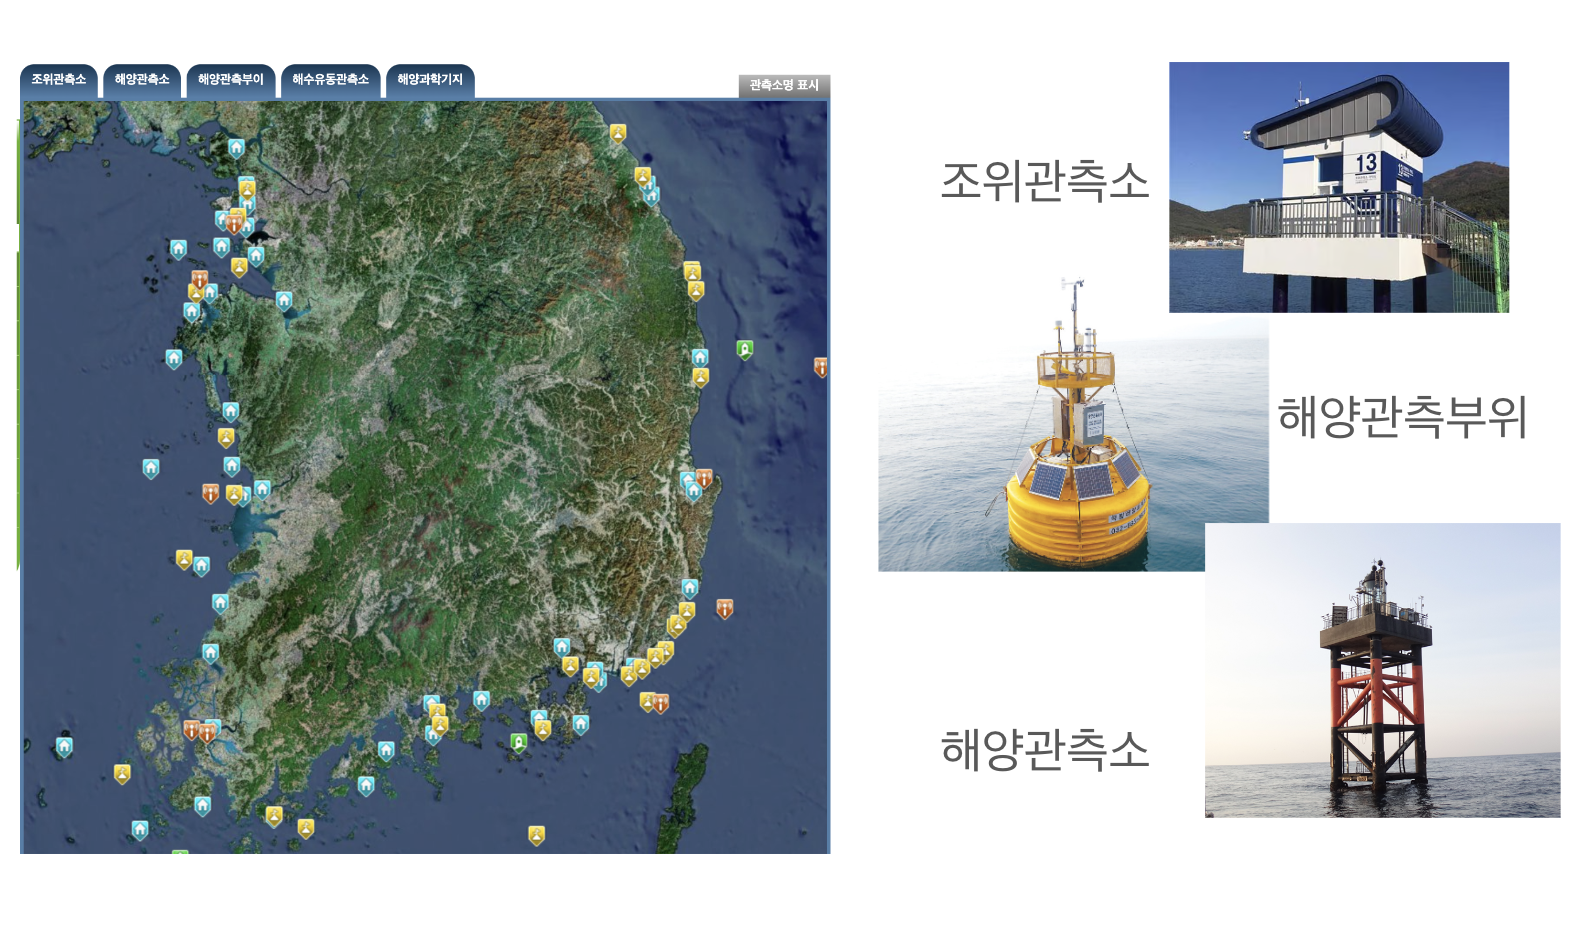

## OpenAPI란?

OpenAPI란 누구나 사용할 수 있도록 공개된 API
- API란 Application Programming Interface의 줄임말로 응용프로그램에서 데이터를 주고 받기 위한 방법(규격)
- 개발시 시간, 비용을 절감하고 양질의 앱 개발 가능
- 승인된 공개키 발급 필요
- 예) 로그인API, 지도API

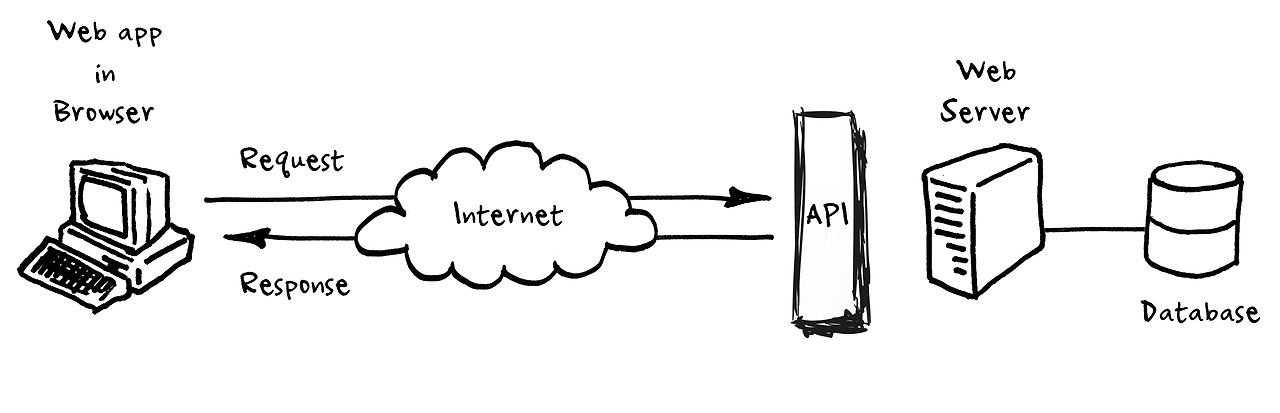

출처: http://sahilsk.github.io/articles/so-youre-writing-api-client


"**어떠한 방식으로 정보를 요청해야 하는지, 그리고 그러한 요청을 보냈을 때 어떠한 형식으로 무슨 데이터를 전달받을 수 있는지"에** 대해 정리한 일종의 규격

- API 구현 방법: 대표적으로 REST API
- API 결과(데이터) 제공 형식: JSON, XML

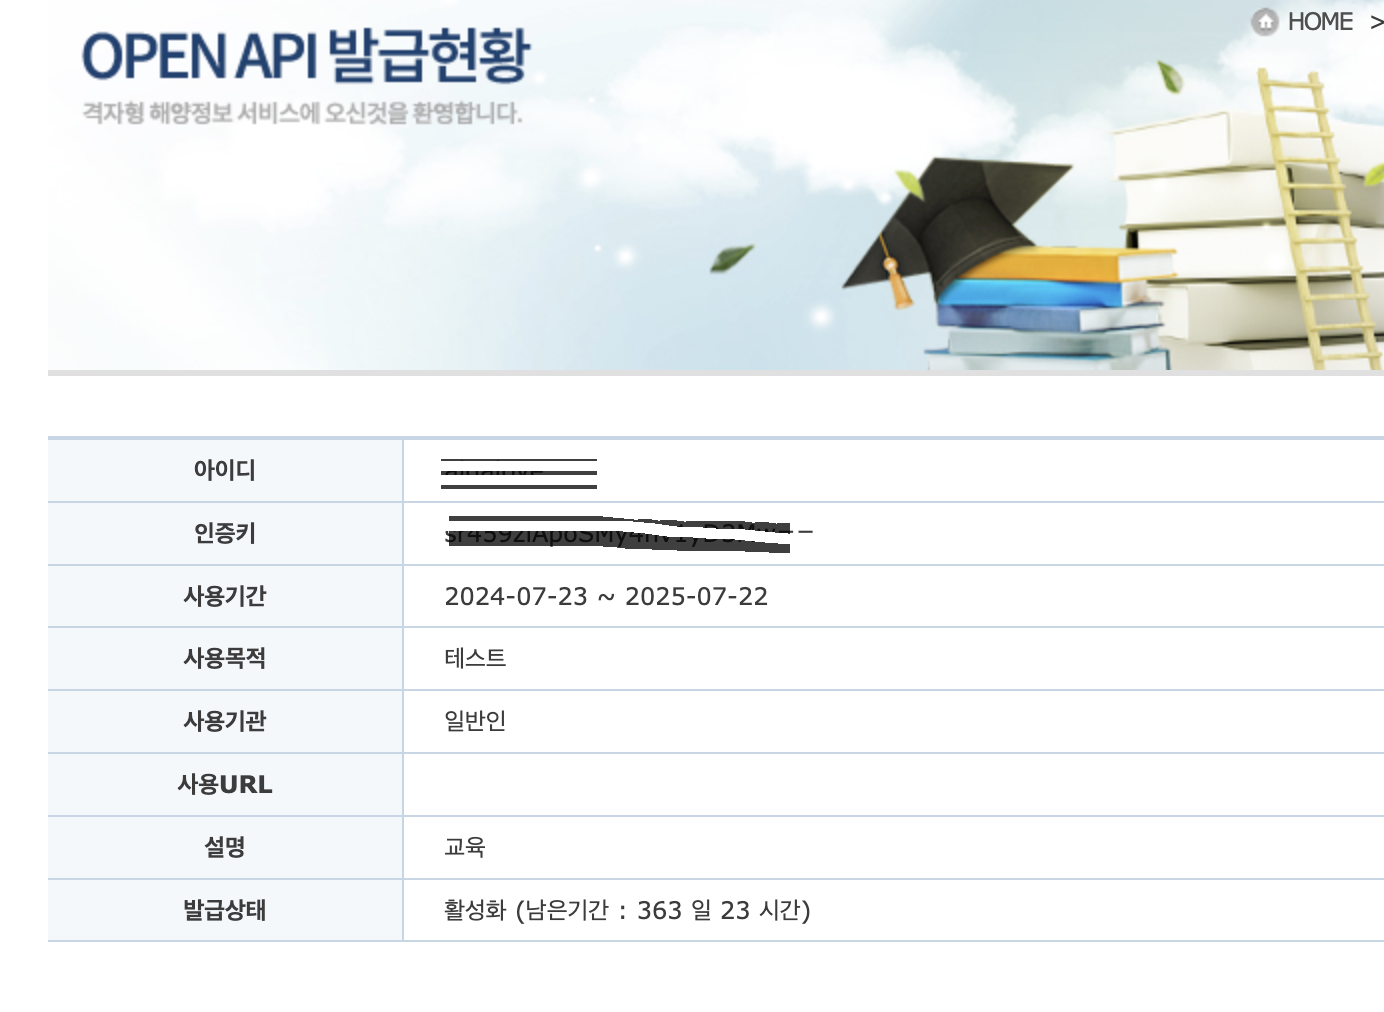




## Pandas
- 판다스(Pandas)는 **파이썬 데이터 분석 라이브러리** 중 하나로, 데이터 조작, 정제, 분석, 시각화 등을 위한 다양한 기능을 제공
- 판다스는 시리즈(Series)와 데이터프레임(DataFrame)이라는 자료형을 이용하여 데이터 처리



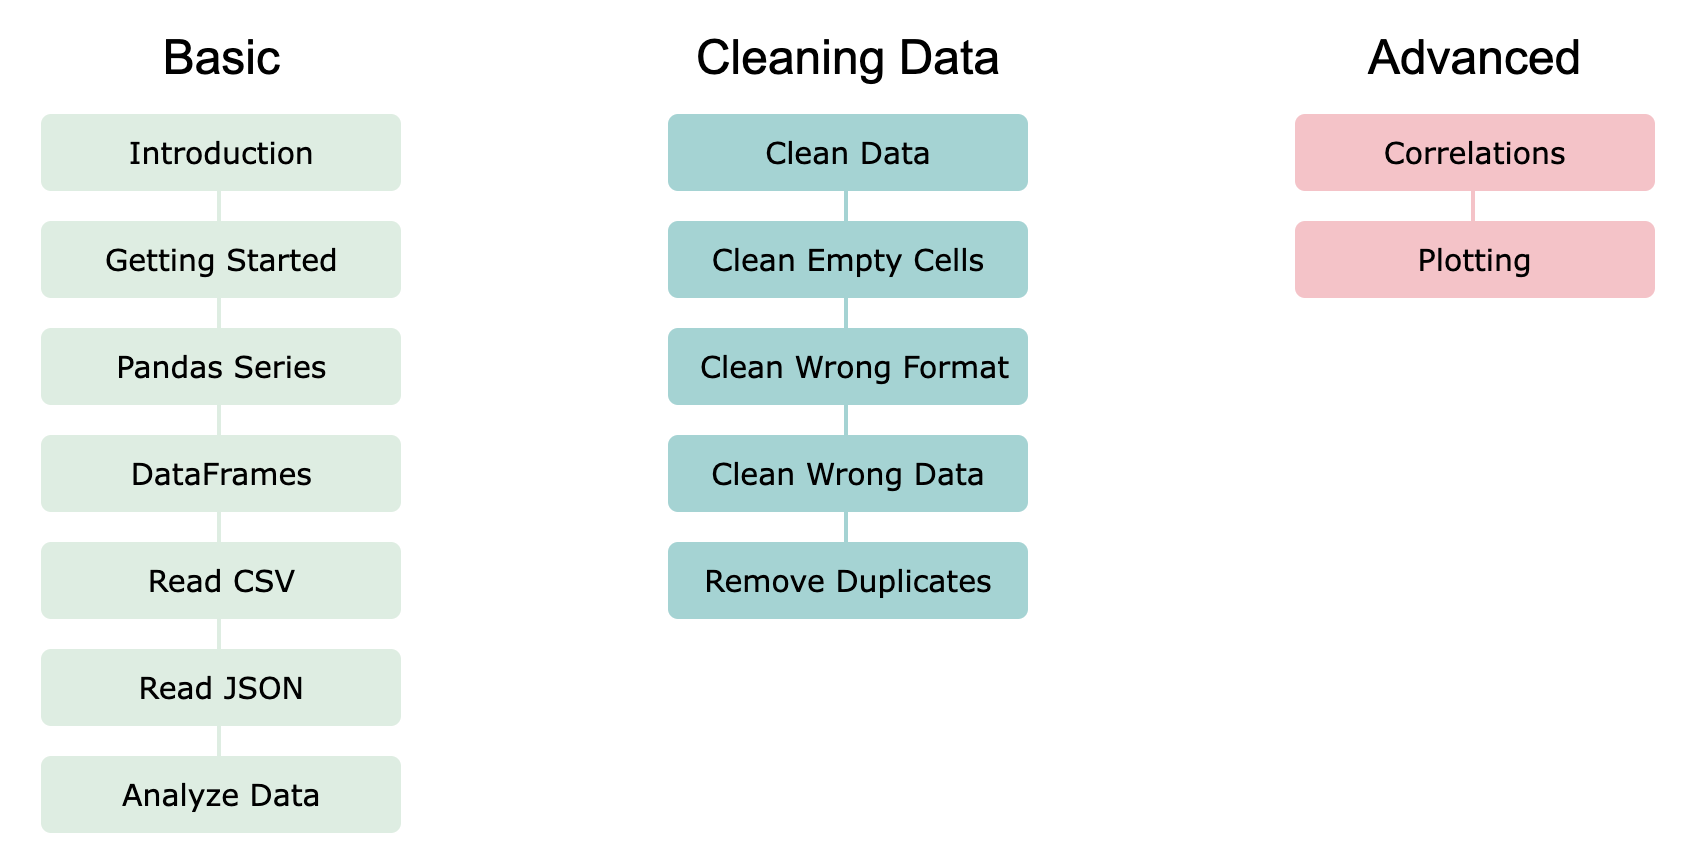

In [ ]:
import urllib.request
import json
import pandas as pd

%config InlineBackend.figure_format = 'retina'

In [ ]:
# 인증키와 주소
key = 'sr459ziApoSMy4hv1yD3Mw=='
td_incheon = 'DT_0001'
td_busan = 'DT_0002'
ob_busan = 'TW_0086'
ob_incheon = 'TW_0076'

In [ ]:
# 조위관측 최신데이터
url =f'http://www.khoa.go.kr/api/oceangrid/tideObsRecent/search.do?ServiceKey={key}&ObsCode={td_incheon}&ResultType=json'

# 데이터 가져오기
response = urllib.request.urlopen(url)
json_str = response.read().decode('utf-8')

# JSON -> Dict으로 변환
json_object = json.loads(json_str)
print(json_object)
# Dict -> 데이터프레임으로 변환
df = pd.json_normalize(json_object['result']['data'])

# 확인
df.head()

{'result': {'meta': {'obs_post_id': 'DT_0001', 'obs_post_name': '인천', 'obs_lat': '37.45194', 'obs_lon': '126.59222', 'obs_last_req_cnt': '19996/20000'}, 'data': {'record_time': '2024-07-25 00:51:00', 'tide_level': '48', 'water_temp': '25.5', 'Salinity': '21.7', 'air_temp': '25.9', 'air_press': '1005.2', 'wind_dir': '174', 'wind_speed': '1.9', 'wind_gust': '2.3'}}}


,record_time,tide_level,water_temp,Salinity,air_temp,air_press,wind_dir,wind_speed,wind_gust
0,2024-07-25 00:51:00,48,25.5,21.7,25.9,1005.2,174,1.9,2.3


In [ ]:
# 조위관측소 실측 & 예측 (날짜검색 기준 1시간 간격)

url = f'http://www.khoa.go.kr/api/oceangrid/tideCurPre/search.do?ServiceKey={key}&ObsCode={td_busan}&Date=20240722&ResultType=json'

# 데이터 가져오기
response = urllib.request.urlopen(url)
json_str = response.read().decode('utf-8')

# JSON -> Dict으로 변환
json_object = json.loads(json_str)
print(json_object)

# Dict -> 데이터프레임으로 변환
df = pd.json_normalize(json_object['result']['data'])

# 확인
df.head()

{'result': {'data': [{'record_time': '2024-07-22 00:00', 'pre_value': '140.34', 'real_value': '157'}, {'record_time': '2024-07-22 01:00', 'pre_value': '289.79', 'real_value': '305'}, {'record_time': '2024-07-22 02:00', 'pre_value': '491.47', 'real_value': '504'}, {'record_time': '2024-07-22 03:00', 'pre_value': '688.27', 'real_value': '702'}, {'record_time': '2024-07-22 04:00', 'pre_value': '834.83', 'real_value': '859'}, {'record_time': '2024-07-22 05:00', 'pre_value': '901.42', 'real_value': '926'}, {'record_time': '2024-07-22 06:00', 'pre_value': '877.22', 'real_value': '910'}, {'record_time': '2024-07-22 07:00', 'pre_value': '777.91', 'real_value': '817'}, {'record_time': '2024-07-22 08:00', 'pre_value': '636.23', 'real_value': '666'}, {'record_time': '2024-07-22 09:00', 'pre_value': '479.32', 'real_value': '499'}, {'record_time': '2024-07-22 10:00', 'pre_value': '326.66', 'real_value': '345'}, {'record_time': '2024-07-22 11:00', 'pre_value': '210.25', 'real_value': '213'}, {'recor

,record_time,pre_value,real_value
0,2024-07-22 00:00,140.34,157
1,2024-07-22 01:00,289.79,305
2,2024-07-22 02:00,491.47,504
3,2024-07-22 03:00,688.27,702
4,2024-07-22 04:00,834.83,859


In [ ]:


url = f'http://www.khoa.go.kr/api/oceangrid/tideObsTemp/search.do?ServiceKey={key}&ObsCode={td_incheon}&Date=20240722&ResultType=json'

# 데이터 가져오기
response = urllib.request.urlopen(url)
json_str = response.read().decode('utf-8')

# JSON -> Dict으로 변환
json_object = json.loads(json_str)
print(json_object)

# Dict -> 데이터프레임으로 변환
df = pd.json_normalize(json_object['result']['data'])

# 확인
df.head()

{'result': {'data': [{'record_time': '2024-07-22 00:00:00', 'water_temp': '25.2'}, {'record_time': '2024-07-22 00:01:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:02:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:03:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:04:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:05:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:06:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:07:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:08:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:09:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:10:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:11:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:12:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:13:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:14:00', 'water_temp': '25.1'}, {'record_time': '2024-07-22 00:15:00', 'water_tem

,record_time,water_temp
0,2024-07-22 00:00:00,25.2
1,2024-07-22 00:01:00,25.1
2,2024-07-22 00:02:00,25.1
3,2024-07-22 00:03:00,25.1
4,2024-07-22 00:04:00,25.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2024-07-22 00:00:00 to 2024-07-23 00:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   water_temp  1441 non-null   object
dtypes: object(1)
memory usage: 22.5+ KB


<class 'pandas.core.series.Series'>
DatetimeIndex: 1441 entries, 2024-07-22 00:00:00 to 2024-07-23 00:00:00
Series name: water_temp
Non-Null Count  Dtype 
--------------  ----- 
1441 non-null   object
dtypes: object(1)
memory usage: 22.5+ KB


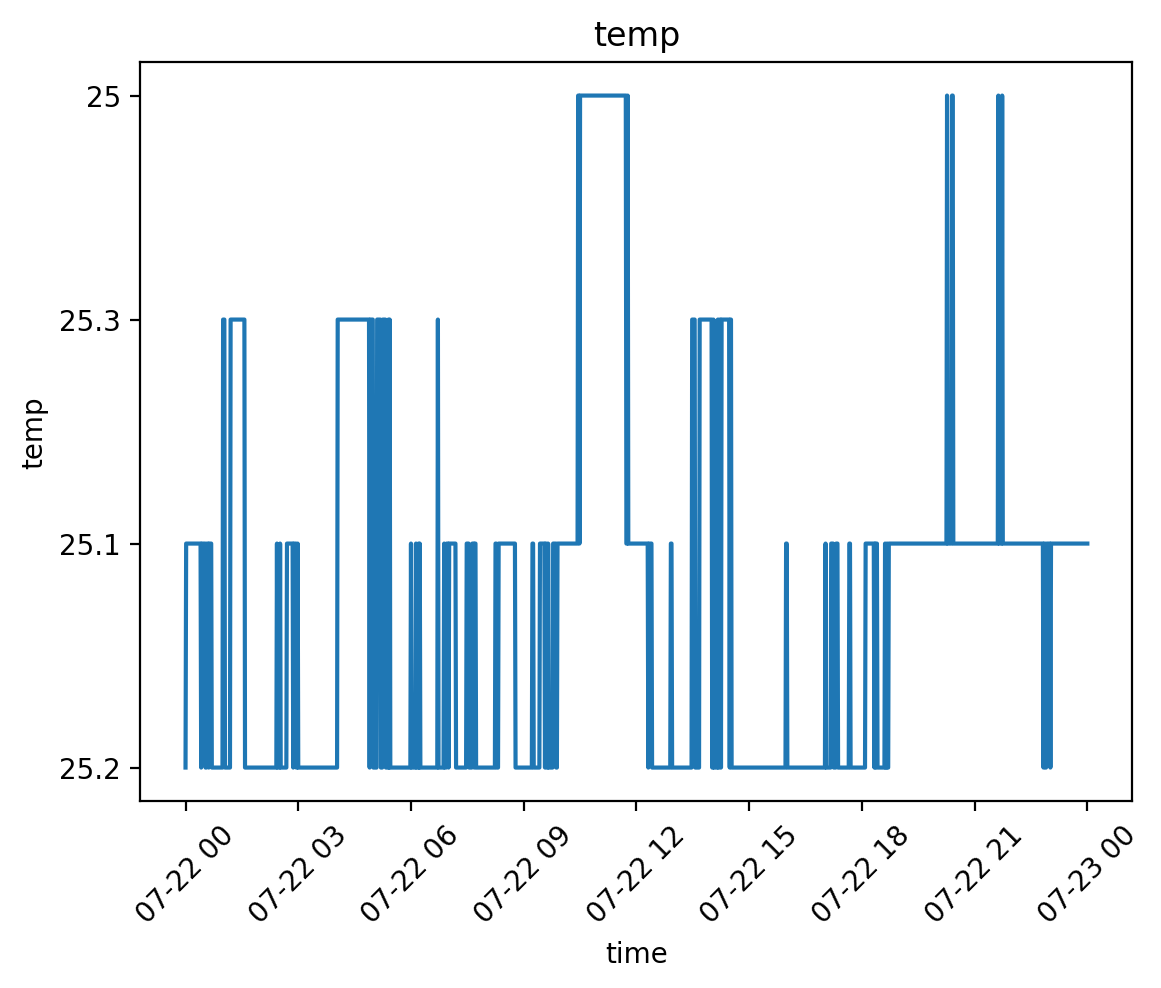

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


# DataFrame의 '시간' 컬럼을 datetime 형식으로 변환하고 인덱스로 설정
dser = df['water_temp']
dser.info()

# 시계열 그래프 그리기
plt.plot(dser.index, dser.values)
plt.xlabel('time')
plt.ylabel('temp')
plt.title('temp')
# x축 레이블 기울이기
plt.xticks(rotation=45)

plt.show()

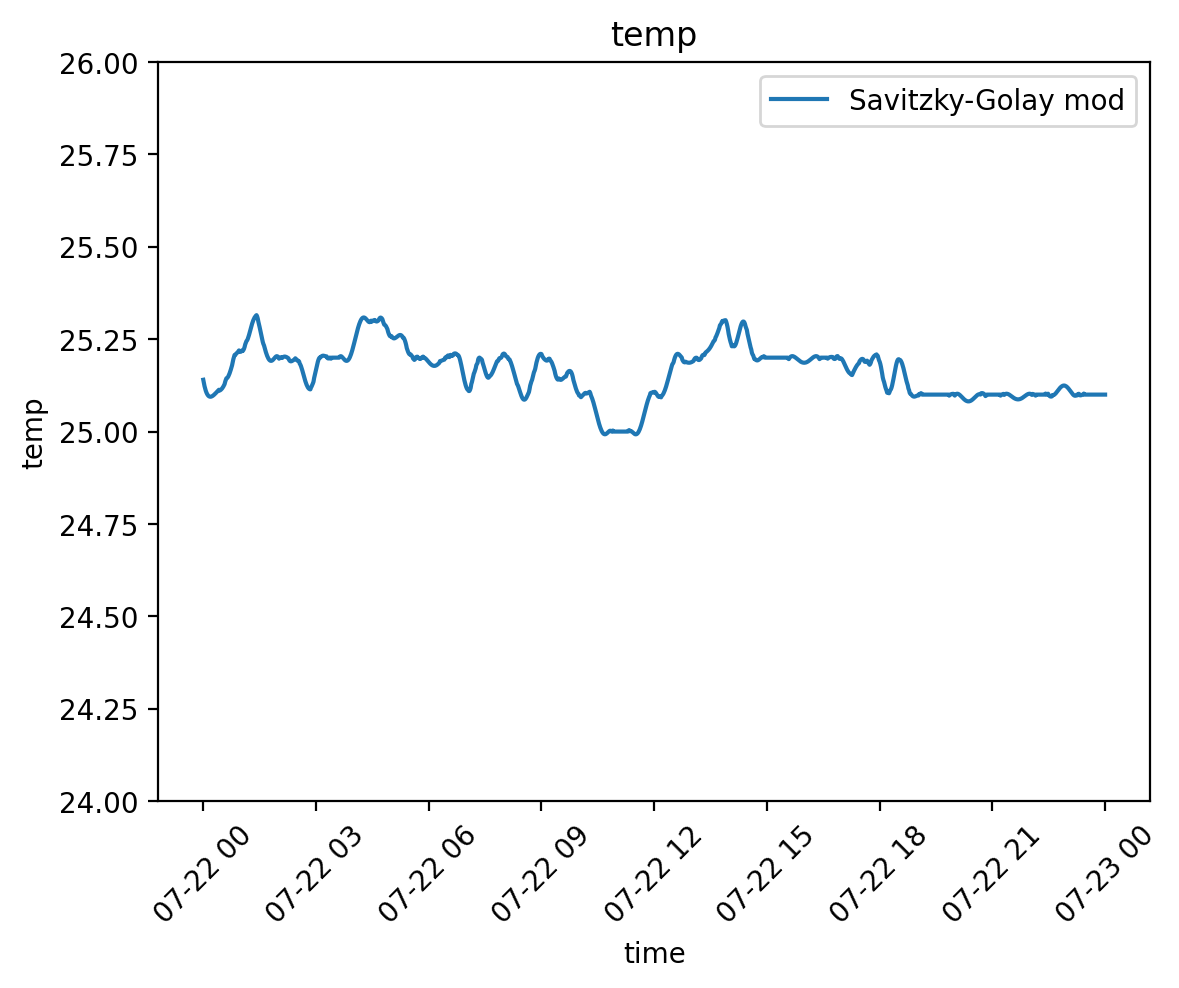

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


# Savitzky-Golay 필터 적용
window_length = 51  # 필터 윈도우 크기 (홀수)
polyorder = 4       # 다항식 차수
df['temp_mod'] = savgol_filter(df['water_temp'], window_length, polyorder)


plt.plot(df.index, df['temp_mod'], label='Savitzky-Golay mod')
plt.xlabel('time')
plt.ylabel('temp')
plt.title('temp')
plt.xticks(rotation=45)
plt.legend()

# y축 범위 설정
plt.ylim(24, 26)

plt.show()